In [34]:
import numpy as np


# Data Collection
Parse local website with cars

In [35]:
import requests, json



headers = '''
authority: auto.ru
method: POST
path: /-/ajax/desktop/listingSpecial/
scheme: https
Accept: */*
Accept-Encoding: gzip, deflate, br
Accept-Language: en-US,en;q=0.9,ru-RU;q=0.8,ru;q=0.7
Content-Length: 67
Content-Type: application/json
Cookie: gdpr=0; _ym_uid=1702491706155596107; _ym_isad=2; spravka=dD0xNzAyNDkxNzE5O2k9MTg1LjIzMC4yNDAuMTYwO0Q9OTA4NEE0RTBGREM0NTgwRkNENjg1RTkzQzlFMDQ3OTg4QkU4Q0U1QzVENURCNzQ4NDI2MDBDNTg2NTgyMDYyQUQ3NkM3NEM2QkZDNDdEQUVFQzFGQjczMkQ3RDg4RkZBODZGQzhEQTg3QkU3MTJEM0U1QjM5OTBEM0E1REZBMzk3RTZDO3U9MTcwMjQ5MTcxOTkwMDM1NTk3MztoPWYwZjZiYmVmY2JjNDYwY2RlYTA3MTc2ZTY5OWEzZThk; suid=d01d16dfc09120126833467977600168.b477b74a3a36b25ac162c37a77073a99; _csrf_token=499c86a4c99ec37567e9477604b5e98464d150e26aa83b83; autoruuid=g6579f6482delqjk0qcmm97ajhkpa2m5.2a5bb5a00a7ec05b6b844aad96237a6a; yandex_login=solodov2vlad; i=+0Tt9frWd6wWlKJAIAMLLPztSZwVs305O1lbepIqdrHWChMByEw8BsZ36lQv1XnEjMYHFjwyjeY9CDICGgFY84nwQF8=; yandexuid=3553563921674213957; L=B219eGgJA3ZmDHd2a1VYcUtGYWIEfABfNR9aHVddGnQbJhgs.1700660588.15534.351466.79e8b72ec615774783371978be9aff3f; yaPassportTryAutologin=1; popups-dr-shown-count=1; fp=4848210a9559dffff3e303c17ce3fcad%7C1702491725478; autoru_sid=98595333%7C1702491724086.7776000.hxmgD8gCiXTnzlk-t7ayyg.9sWxTrGFeqZXfY_azuFQ60174oyFll-eB2-wq2f5QU0; autoru_gdpr=1; from=direct; autoru_sso_blocked=1; Session_id=3:1702547765.5.0.1700660588761:oPDmuQ:cc.1.2:1|886815293.0.2.3:1700660588|61:10018323.901995.2NlXMPu-MNh2X4Yyy9b3tKbLmGY; sessar=1.1184.CiBj0T2qJs75n4DNv-qqhnj_mMA-MCrcLYIMQ2Alguh59g.wDPQcSUCHZghoraa8idi3_4VFXBUuBbczknr8x57UdE; ys=udn.cDrQktC70LDQtCBDb9C70L7QtNC%2B0LI%3D#c_chck.2950739780; mda2_beacon=1702547765278; sso_status=sso.passport.yandex.ru:synchronized; cycada=Bq4ODN1EFkL/DMrFaDMiXfuJH3Zm7Ed8Ed7AOFiMiPI=; _ym_d=1702548582; layout-config={"screen_height":1080,"screen_width":1920,"win_width":769,"win_height":919}; count-visits=4; _yasc=fbFpOL2iC3D22oIa8IlVcgs0m968yvdqEOE1yVtwVvou9ssgGLez9OhAXbn4KQUijnX33zWm7lYIIcs=; from_lifetime=1702549154320
Origin: https://auto.ru
Referer: https://auto.ru/taganrog/cars/all/
Sec-Ch-Ua: "Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"
Sec-Ch-Ua-Mobile: ?0
Sec-Ch-Ua-Platform: "Windows"
Sec-Fetch-Dest: empty
Sec-Fetch-Mode: same-origin
Sec-Fetch-Site: same-origin
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36
X-Client-App-Version: 559.0.13081605
X-Client-Date: 1702549155094
X-Csrf-Token: 499c86a4c99ec37567e9477604b5e98464d150e26aa83b83
X-Page-Request-Id: 7f81654aaa789d5384f52f416884f85d
X-Requested-With: XMLHttpRequest
X-Retpath-Y: https://auto.ru/taganrog/cars/all/
X-Yafp: {"a1":"IMF0bURvryz6Sg==;0","a2":"PyBs0uxk94Q0K/CJ4jmv+nAvAh632w==;1","a3":"s5qpsuW8odHNGXxjrAvG1g==;2","a4":"BX3P7HPc1apwnPBqW/qTVUvhGWvj3kbWIaFeUhTlW2YPrw==;3","a5":"pHQOWQ4g0Fb8Tw==;4","a6":"/Zg=;5","a7":"BLpQ3H14IAngzA==;6","a8":"x5bkl2Nvf0s=;7","a9":"EMCAVhKRZ1qZzQ==;8","b1":"mYAzq1lnLB4=;9","b2":"RKcT7+R+I+oeRg==;10","b3":"FywAV35iCqaslw==;11","b4":"OHgg0UP56UI=;12","b5":"EorkLbe9w2brfg==;13","b6":"N9HJQEuDOaqfJQ==;14","b7":"G9aWKda0sy3tiw==;15","b8":"PUoNLIZoLfVb3w==;16","b9":"b710RUVrpQMzWw==;17","c1":"BTchpA==;18","c2":"tXIVHIy/AYscJuXaXHBu7llI;19","c3":"RVqJEP4cx1sd/5yKSkB03qrc;20","c4":"QaOR5deoLJQ=;21","c5":"KiWTCGlHiAg=;22","c6":"Bu3Dmg==;23","c7":"iHoFvqWmJb4=;24","c8":"fDA=;25","c9":"KSGw+5Tgg9Q=;26","d1":"LI2CzRtgD9E=;27","d2":"TVR2Lg==;28","d3":"I+jAUgRN9kSvxg==;29","d4":"K/V+2R9VJkU=;30","d5":"J9x+93VodwMBxw==;31","d7":"cf8flNJAGNo=;32","d8":"dKuf4MA9GJuZr7NO/n3xbCMDZcdlLvSbN/8=;33","d9":"bPcxToeEiBc=;34","e1":"KxKXmBTYbzzVnA==;35","e2":"4AMLW3FkH5E=;36","e3":"ZFTPGB/mdeo=;37","e4":"UHDeI+e8szY=;38","e5":"IOZHjuTOM2yO6w==;39","e6":"brKsftMVSk0=;40","e7":"sIxD+k1H05hlFw==;41","e8":"MABVpZphdBo=;42","e9":"GWe0b8XkuMU=;43","f1":"PSJd46cEgtLbIA==;44","f2":"ClcfrpTAptA=;45","f3":"VmEkiYlozWvMVA==;46","f4":"Y9GHba6Hc5E=;47","f5":"0RbQQ0bHJ4KPbA==;48","f6":"KwYLlZ6jVQJ8Dg==;49","f7":"WZf1zGkgz1393w==;50","f8":"aylJTgCY+spOPg==;51","f9":"9QuOKPXI4ew=;52","g1":"5r1boPAW+JDbrw==;53","g2":"IaaCRMb8Mr5zQQ==;54","g3":"Ye6yiOh8iG8=;55","g4":"XRVmj9QPKyWSfQ==;56","g5":"W1hJ/njt998=;57","g6":"+xisoknNs3c=;58","g7":"bCP5L/KG/5U=;59","g8":"MSdZRc/NPHE=;60","g9":"QM5Rv1Z3Xa4=;61","h1":"Z8tYGp3qa2JlqQ==;62","h2":"2MUpXLLWjEKojA==;63","h3":"zCzT8a29+Q/JUg==;64","h4":"xHlZCQ0jp/sb/Q==;65","h5":"F2KpIcx44hI=;66","h6":"KM0BzYtqGXNL1g==;67","h7":"wKDY+isYfSDzp6/t/O4KHbKhKXkq7DTp9HLLn6FwIfNMKHVT;68","h8":"B03PcLIFQEhcdQ==;69","h9":"w9ul1t0TlMOrfQ==;70","i1":"V1ItNmSP6E0=;71","i2":"G6Bj+zEjdkB1SA==;72","i3":"/+1ePVf+eglclw==;73","i4":"3r89Bsz+HNpZCQ==;74","i5":"7KM3NTU60+4G8Q==;75","z1":"Bb/Ui/OXY9UdXqgMUkWaABKmNa8ffObNcaz28bN0cMLuQM6O6RcxSY5X00O9G3d9D2uskgUnx9NuXtYbxsKSqw==;76","z2":"FXiyJrWv6QiPHjyQcwswoTzfE8GevElXQsXJn9OrlQCKf7gr0TeEXjQjbRmrQTTKHQwnKojRV8TSGc9SbF9vXw==;77","y2":"biwSPnHfadN3Dg==;78","y3":"C7Jo+mINo3wFNQ==;79","y6":"89N5BfqQ1f+YPg==;80","y8":"jIeqHdPDfMBvqA==;81","x4":"mckn8T7Cni13Qg==;82","z5":"DKQuanlfMO8=;83","z4":"3zTbE36933hrbA==;84","z6":"BpBgzndvtxrC+tGQ;85","z7":"TWKyNy+7pZ2vXZWr;86","z8":"BSZnVmv2k4DUqh9wfZc=;87","z9":"iYsrJVK1LiuuKKns;88","y1":"8RTmwHkZIvTuLJif;89","y4":"mep14hAiqwF/rsHg;90","y5":"AMlhWbDul+GQbBreHFo=;91","y7":"Uvtmm17QhwsZ83Uj;92","y9":"VZ79cZuumWWppxCNZe8=;93","y10":"GY71kZHYGGHMUGlfPag=;94","x1":"KzhWdfJTbNa2EqbV;95","x2":"UvU3CDW5yy0QZ1Jcggg=;96","x3":"gceHmPhdY6EqcXeI;97","x5":"DkhpTO2OPeeahL9Y;98","z3":"Tc8ZxIEEVSC+MY8l+iM=;99","v":"6.3.1","pgrdt":"adxI5LUyFBshqG9cEf49xHmzRlQ=;100","pgrd":"gU6hrsWzuCY1QMRQ2CI9eJ+pPiTRlDlEsXK5/RwwaO+uRlkKkx+Uar1ucUlvYfI0STDmJTzXT7DtIyej275V2ej1Rb5WrIDFTvtkHuclWDwJL13BnCiNA3XgqMhyA20GFiRuDt+cq8AfPihT7MpkDdqLGv4x2uCxIoasVHOsBHrmeLUTNAevWi/dOd2nl51tGvTWg8X1ACXs9MDjOnlLb2CqnGk="}
'''.strip().split("\n")

dict_headers = {}
for header in headers:
    key, value = header.split(': ')
    dict_headers[key] = value
# print(dict_headers)

url = "https://auto.ru/-/ajax/desktop/listingSpecial/"

offers = []
a=0
while True:
  try:
      a+=1
      param = {"section": "all", "category": "cars", "geo_radius": 300, "geo_id": "[971]", "page": a}
      response = requests.post(url, json=param, headers=dict_headers)
      offers.extend(response.json()['offers'])
      print ("Parsing page " + str(a))

      if (a==200):
        break
  except:
      break

with open("data.json", "w", encoding="utf8") as f:
  json.dump(offers, f)

Parsing page 1
Parsing page 2
Parsing page 3
Parsing page 4
Parsing page 5
Parsing page 6
Parsing page 7
Parsing page 8
Parsing page 9
Parsing page 10
Parsing page 11
Parsing page 12
Parsing page 13
Parsing page 14
Parsing page 15
Parsing page 16
Parsing page 17
Parsing page 18
Parsing page 19
Parsing page 20
Parsing page 21
Parsing page 22
Parsing page 23
Parsing page 24
Parsing page 25
Parsing page 26
Parsing page 27
Parsing page 28
Parsing page 29
Parsing page 30
Parsing page 31
Parsing page 32
Parsing page 33
Parsing page 34
Parsing page 35
Parsing page 36
Parsing page 37
Parsing page 38
Parsing page 39
Parsing page 40
Parsing page 41
Parsing page 42
Parsing page 43
Parsing page 44
Parsing page 45
Parsing page 46
Parsing page 47
Parsing page 48
Parsing page 49
Parsing page 50
Parsing page 51
Parsing page 52
Parsing page 53
Parsing page 54
Parsing page 55
Parsing page 56
Parsing page 57
Parsing page 58
Parsing page 59
Parsing page 60
Parsing page 61
Parsing page 62
Parsing page 63
P

In [36]:
import pandas
pandas.read_json("data.json").to_excel("output.xlsx")


# Data Preparation

## Create dataset

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
import pandas as pd
json_file_path = 'data.json'

# Read the JSON file into a Pandas DataFrame
df = pd.read_json(json_file_path)



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   availability            7400 non-null   object
 1   color_hex               7400 non-null   object
 2   delivery_info           7400 non-null   object
 3   discount_options        7397 non-null   object
 4   documents               7400 non-null   object
 5   is_favorite             7400 non-null   bool  
 6   old_category_id         7400 non-null   int64 
 7   owner_expenses          7270 non-null   object
 8   score                   7400 non-null   object
 9   services                7400 non-null   object
 10  status                  7400 non-null   object
 11  tags                    7400 non-null   object
 12  predicted_price_ranges  7400 non-null   object
 13  user_ref                7400 non-null   object
 14  source_info             7400 non-null   object
 15  addi

In [40]:
dfDocuments = df['documents']

dfDocuments = pd.json_normalize(dfDocuments)
dfDocuments.info() #owners_number year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   owners_number             7400 non-null   int64  
 1   pts_original              6094 non-null   object 
 2   custom_cleared            7400 non-null   bool   
 3   year                      7400 non-null   int64  
 4   vin                       7095 non-null   object 
 5   pts                       7039 non-null   object 
 6   license_plate             4750 non-null   object 
 7   pts_resolution_ok         7400 non-null   bool   
 8   vin_resolution            6996 non-null   object 
 9   owners_resolution         6096 non-null   object 
 10  legal_resolution          6096 non-null   object 
 11  accidents_resolution      6096 non-null   object 
 12  not_registered_in_russia  2472 non-null   object 
 13  purchase_date.year        3296 non-null   float64
 14  purchase

In [41]:
dfPrice = df['price_info']

dfPrice = pd.json_normalize(dfPrice)
dfPrice.info() #RUR

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     7400 non-null   int64 
 1   currency  7400 non-null   object
 2   EUR       7400 non-null   int64 
 3   RUR       7400 non-null   int64 
 4   USD       7400 non-null   int64 
 5   with_nds  7400 non-null   bool  
dtypes: bool(1), int64(4), object(1)
memory usage: 296.4+ KB


In [42]:
dfState = df['state']

dfState = pd.json_normalize(dfState)
dfState.info() #condition

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 63 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   condition                                                            7400 non-null   object 
 1   mileage                                                              7400 non-null   int64  
 2   image_urls                                                           7400 non-null   object 
 3   images_count                                                         7400 non-null   int64  
 4   external_panorama.published.id                                       170 non-null    object 
 5   external_panorama.published.status                                   170 non-null    object 
 6   external_panorama.published.video_h264.preview_url                   170 non-null    object 
 7   extern

In [43]:
df_tags = pd.get_dummies(df['tags'].apply(pd.Series).stack()).sum()
df_tags.info() #dummies

<class 'pandas.core.series.Series'>
Index: 126 entries, Detroit2016 to without_mileage_in_russia
Series name: None
Non-Null Count  Dtype
--------------  -----
126 non-null    int64
dtypes: int64(1)
memory usage: 6.0+ KB


In [44]:
dfOwner = df['owner_expenses']

dfOwner = pd.json_normalize(dfOwner)
dfOwner.info() #transport_tax.horse_power

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   transport_tax.tax_by_year           7199 non-null   float64
 1   transport_tax.year                  7199 non-null   float64
 2   transport_tax.rid                   7199 non-null   float64
 3   transport_tax.rate                  7127 non-null   float64
 4   transport_tax.horse_power           7199 non-null   float64
 5   transport_tax.holding_period_month  7199 non-null   float64
 6   transport_tax.boost                 7199 non-null   float64
 7   osago_insurance                     3550 non-null   object 
dtypes: float64(7), object(1)
memory usage: 462.6+ KB


In [45]:
dfVehicle_info = df['vehicle_info']

dfVehicle_info = pd.json_normalize(dfVehicle_info)
dfVehicle_info.info() #configuration.body_type configuration.auto_class mark_info.logo.name model_info.name

for col in dfVehicle_info.columns:
    print(col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Columns: 296 entries, steering_wheel to equipment.775
dtypes: bool(1), float64(18), int64(5), object(272)
memory usage: 16.7+ MB
steering_wheel
vendor
configuration.body_type
configuration.id
configuration.doors_count
configuration.auto_class
configuration.human_name
configuration.trunk_volume_min
configuration.trunk_volume_max
configuration.body_type_group
configuration.seats
configuration.main_photo.name
configuration.main_photo.sizes.orig
configuration.main_photo.sizes.wizardv3mr
configuration.main_photo.sizes.cattouch
configuration.main_photo.sizes.main
configuration.main_photo.sizes.mini-card
configuration.main_photo.sizes.mobile
configuration.main_photo.base_url
configuration.main_photo.aliases
configuration.tags
configuration.landing_description
configuration.width_mirrors
configuration.turning_circle
configuration.body_code
complectation.id
equipment.seats-5
mark_info.code
mark_info.name
mark_info.ru_name

In [46]:
dfVehicle_info['mark_info.name'].unique()

array(['Lada (ВАЗ)', 'Volkswagen', 'Volvo', 'Skoda', 'Lexus',
       'Mitsubishi', 'Audi', 'BMW', 'Jeep', 'Kia', 'SsangYong', 'Mini',
       'Renault', 'Ford', 'Mazda', 'Bentley', 'Nissan', 'Mercedes-Benz',
       'Hyundai', 'Toyota', 'Daewoo', 'Genesis', 'Infiniti', 'Datsun',
       'Exeed', 'Citroen', 'Land Rover', 'Porsche', 'LiXiang', 'Honda',
       'Renault Samsung', 'BYD', 'Opel', 'Haval', 'ЗАЗ', 'Peugeot',
       'Fiat', 'Chevrolet', 'Ram', 'Geely', 'CHERY', 'Avatr', 'Zeekr',
       'УАЗ', 'Xcite', 'Tank', 'Dodge', 'Subaru', 'Cadillac', 'Changfeng',
       'ГАЗ', 'Москвич', 'BAIC', 'GMC', 'Lifan', 'Great Wall', 'Suzuki',
       'Seres', 'Lynk & Co', 'Jaguar', 'Zotye', 'Changan', 'SWM',
       'Xiaomi', 'Denza', 'Proton', 'Tesla', 'Voyah', 'Buick',
       'GAC Trumpchi', 'Acura', 'Omoda', 'Jetour', 'Alpina', 'Ambertruck',
       'Rolls-Royce', 'GAC', 'Lincoln', 'Aito', 'Lamborghini', 'Ferrari',
       'Maserati', 'Bugatti', 'Foton', 'MG', 'Saab', 'iCar', 'Belgee',
       'Oting'

In [47]:
dfs = [df_tags, dfState['mileage'], dfPrice["EUR"], dfDocuments["owners_number"], dfDocuments["year"], dfOwner["transport_tax.horse_power"], dfVehicle_info['configuration.body_type'],
       dfVehicle_info['configuration.auto_class'], dfVehicle_info['mark_info.name'],
       dfVehicle_info['tech_param.power']]
df_res = pd.concat(dfs, axis=1)

df_res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7526 entries, Detroit2016 to 7399
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   0                          126 non-null    float64
 1   mileage                    7400 non-null   float64
 2   EUR                        7400 non-null   float64
 3   owners_number              7400 non-null   float64
 4   year                       7400 non-null   float64
 5   transport_tax.horse_power  7199 non-null   float64
 6   configuration.body_type    7400 non-null   object 
 7   configuration.auto_class   7396 non-null   object 
 8   mark_info.name             7400 non-null   object 
 9   tech_param.power           7400 non-null   float64
dtypes: float64(7), object(3)
memory usage: 646.8+ KB


## Dataset preparation

In [48]:
df_res2 = pd.DataFrame(df_res)

In [49]:
df_res2.isna().any()

0                            True
mileage                      True
EUR                          True
owners_number                True
year                         True
transport_tax.horse_power    True
configuration.body_type      True
configuration.auto_class     True
mark_info.name               True
tech_param.power             True
dtype: bool

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Transform the categorical column
df_res2['configuration.body_type'] = label_encoder.fit_transform(df_res2['configuration.body_type'])

# Print the mapping between original labels and encoded values
for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_value}")


ALLROAD_3_DOORS: 0
ALLROAD_5_DOORS: 1
CABRIO: 2
COMPACTVAN: 3
COUPE: 4
COUPE_HARDTOP: 5
FASTBACK: 6
HATCHBACK_3_DOORS: 7
HATCHBACK_4_DOORS: 8
HATCHBACK_5_DOORS: 9
LIFTBACK: 10
MICROVAN: 11
MINIVAN: 12
PICKUP_ONE_HALF: 13
PICKUP_TWO: 14
ROADSTER: 15
SEDAN: 16
TARGA: 17
VAN: 18
WAGON_5_DOORS: 19
nan: 20


In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Transform the categorical column
df_res2['mark_info.name'] = label_encoder.fit_transform(df_res2['mark_info.name'])

# Print the mapping between original labels and encoded values
for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_value}")

Acura: 0
Aito: 1
Alfa Romeo: 2
Alpina: 3
Ambertruck: 4
Audi: 5
Avatr: 6
BAIC: 7
BMW: 8
BYD: 9
Belgee: 10
Bentley: 11
Bugatti: 12
Buick: 13
CHERY: 14
Cadillac: 15
Changan: 16
Changfeng: 17
Chevrolet: 18
Chrysler: 19
Citroen: 20
Daewoo: 21
Daihatsu: 22
Datsun: 23
Denza: 24
Dodge: 25
Exeed: 26
Ferrari: 27
Fiat: 28
Ford: 29
Foton: 30
GAC: 31
GAC Trumpchi: 32
GMC: 33
Geely: 34
Genesis: 35
Great Wall: 36
Haval: 37
HiPhi: 38
Honda: 39
Hongqi: 40
Hyundai: 41
Infiniti: 42
JAC: 43
Jaecoo: 44
Jaguar: 45
Jeep: 46
Jetour: 47
Kia: 48
Lada (ВАЗ): 49
Lamborghini: 50
Land Rover: 51
Lexus: 52
LiXiang: 53
Lifan: 54
Lincoln: 55
Livan: 56
Lynk & Co: 57
MG: 58
Maserati: 59
Mazda: 60
Mercedes-Benz: 61
Mini: 62
Mitsubishi: 63
Nissan: 64
Omoda: 65
Opel: 66
Oting: 67
Packard: 68
Peugeot: 69
Polar Stone (Jishi): 70
Porsche: 71
Proton: 72
Ram: 73
Renault: 74
Renault Samsung: 75
Rolls-Royce: 76
SWM: 77
Saab: 78
Seres: 79
Skoda: 80
Smart: 81
Solaris: 82
SsangYong: 83
Subaru: 84
Suzuki: 85
Tank: 86
Tesla: 87
Toyota:

In [52]:
categorical_columns = [c for c in df_res2.columns if df_res2[c].dtype.name == 'object']
numerical_columns   = [c for c in df_res2.columns if df_res2[c].dtype.name != 'object']

print(categorical_columns)
print(numerical_columns)

['configuration.auto_class']
[0, 'mileage', 'EUR', 'owners_number', 'year', 'transport_tax.horse_power', 'configuration.body_type', 'mark_info.name', 'tech_param.power']


In [53]:
label_encoder = LabelEncoder()

for categorical_column in categorical_columns:
    fill_value = df_res2[categorical_column].mode()[0]
    df_res2[categorical_column] = df_res2[categorical_column].fillna(fill_value)
    df_res2[categorical_column] = label_encoder.fit_transform(df_res2[categorical_column])


In [54]:
for numerical_column in numerical_columns:
    fill_value = df_res2[numerical_column].median()
    df_res2[numerical_column] = df_res2[numerical_column].fillna(fill_value)


In [55]:
df_res2["tech_param.power"].max()

1600.0

In [56]:
df_res2.isna().any()

0                            False
mileage                      False
EUR                          False
owners_number                False
year                         False
transport_tax.horse_power    False
configuration.body_type      False
configuration.auto_class     False
mark_info.name               False
tech_param.power             False
dtype: bool

<Axes: >

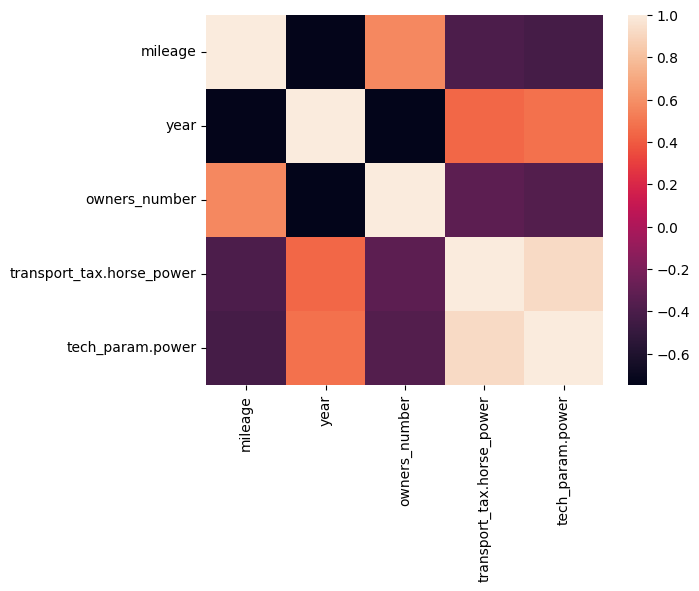

In [57]:
correlation_matrix = df_res2.corr()

filtered = pd.DataFrame()

for column in correlation_matrix.columns:
  for index in correlation_matrix.index:
    if column != index and abs(correlation_matrix.loc[column, index]) > 0.6: 
      filtered[column] = df_res2[column]
      filtered[index] = df_res2[index]


# Отображение heatmap
import seaborn as sns
sns.heatmap(filtered.corr())

In [58]:
filtered.columns

Index(['mileage', 'year', 'owners_number', 'transport_tax.horse_power',
       'tech_param.power'],
      dtype='object')

In [59]:
for col in df_res2.columns:
    print(col)

0
mileage
EUR
owners_number
year
transport_tax.horse_power
configuration.body_type
configuration.auto_class
mark_info.name
tech_param.power


# Model Training and saving

In [60]:
X = df_res2[[ 'mileage',
              'owners_number',
              'year', 'transport_tax.horse_power',
              'configuration.body_type',  'configuration.auto_class',
              'mark_info.name',          'tech_param.power']]
y = df_res2['EUR']

# Обучающаяся и тестовая выборка
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [61]:
print ("max price = " + str(y.max()))
print ("min price = " + str(y.min()))

max price = 9691143.0
min price = 417.0


## Random Forest

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

modelForest = RandomForestRegressor()
modelForest.fit(X_train, y_train)

Y_pred = modelForest.predict(X_test)
mae = mean_absolute_error(y_test, Y_pred)
print("MAE:", mae)


MAE: 7724.166532762842


## GradientBoostingRegressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

modelGradient = GradientBoostingRegressor()
modelGradient.fit(X_train, y_train)

y_pred = modelGradient.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE with Gradient Boosting:", mae) 

MAE with Gradient Boosting: 12354.392542359123


## support vector regression

In [64]:
from sklearn.svm import SVR
model = SVR()
from sklearn.metrics import mean_absolute_error

model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE with SVR:", mae) 

MAE with SVR: 33368.00795488111


Let's compare MAE

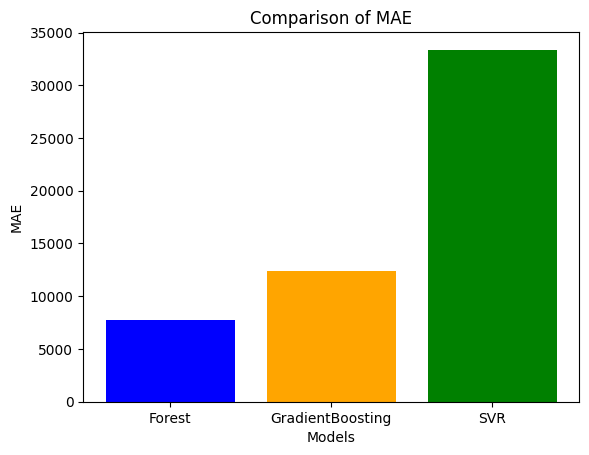

In [67]:
import matplotlib.pyplot as plt


labels = ['Forest', 'GradientBoosting', 'SVR']
mae_values = [7724, 12354, 33368]

plt.bar(labels, mae_values, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE')
plt.show()

### Predictions

so, the random forest is the best model here. let's save take a look at how to use it and save it after that.

In [65]:
new_data = pd.DataFrame({
'mileage': [169000],
'owners_number': [2],
'year': [2014], 
'transport_tax.horse_power': [173],
'configuration.body_type': [1],  
'configuration.auto_class': [1],
'mark_info.name': [75],
'tech_param.power': [435],
}, index=[0])


# Use the trained model to make predictions
predicted_value = modelForest.predict(new_data)

print("Predicted Value:", predicted_value)


Predicted Value: [37121.21]


## Save model

In [66]:
import joblib
joblib.dump(modelForest, 'car_prediction.pkl')
#loaded_model = joblib.load('car_prediction.pkl')


['car_prediction.pkl']